In [ ]:
'''
your-700€-smartphone

Have you ever wondered if you should pay 700€ for a smartphone? Does the price really come with the quality? 
Will it indeed serve you a longer time, and hence make the price worth it?

For example, If 30€ generic pair of jeans last 12 months, it's not worth it to pay 120€ for Levi's 
that last 18 months, as you could have 48 months worth of jeans vs 18 months, for the same price.

In my personal experience, I have noticed that expensive electronics break as often as cheap ones do. 
I also have noticed, that while it is worth to pay slightly more for a device (buy the second cheapest device), 
it often wasn't a good deal to pay premium.

So far this is just an opinion - what would the data say?

To this aim, I am going to scrape Amazon reviews for Samsung smartphones to find out 
if more expensive smartphones result in more customer happiness.

Of course this reasoning is simplistic, as there are many other factors influencing the review decision, such as:

1) Do people rate products relative to their price? Do they know they should expect less of a cheap smartphone and rate the product accordingly?
2) Conversely, could it be that expensive products have worse reviews, because you expect more of a 700€ smartphone?
3) When do people rate the product? Once it arrives, right after the joy of unboxing it, after a couple of days of use, or at a later time? If they rate it early, we miss the chance of penalty points if it breaks down (or is it meant to break down) within 6 or 12 months
4) Are we rating quality or durability? What if I enjoy wearing the Levi jeans so much that it's ok if they last only 12 months?

At any rate, not to get into the polemics too much, let's assume the simplistic model that more expensive smartphones should result in more customer happiness which should be expressed in the number of stars in the reviews.


if you enjoyed this analysis feel free to read my Master Thesis I wrote on the topic of Price-Quality while studying at the University of Brussels:
'''

In [149]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import random
import re
from selenium.common.exceptions import NoSuchElementException
import requests
from selenium.webdriver.support.ui import Select
import matplotlib.pyplot as plt
%matplotlib notebook

In [31]:
data = []
url_base = "https://www.amazon.de/gp/search/ref=sr_nr_p_36_6?rnid=389294011&keywords=samsung+smartphone&rh=n%3A562066%2Cn%3A1384526031%2Cn%3A3468301%2Ck%3Asamsung+smartphone%2Cp_n_operating_system_browse-bin%3A1602276031&qid=1520446975&low-price=60&high-price="
driver = webdriver.Firefox()
driver.get(url_base)

In [32]:
while True:
    soup = BeautifulSoup(driver.page_source, "lxml")
    divs = soup.findAll("div", attrs={'class' : re.compile("s-item-container")})

    for div in divs:
        try:
            title = div.find("a", attrs={'class' : re.compile("detail-page")}).attrs['title']
            price = div.find("span", attrs={'class' : re.compile("price")})
            price = price.getText()
            stars = div.find("span", attrs={'class' : "a-icon-alt"}, text=re.compile("Sternen")).getText()
            reviews = div.find("a", {'href' : re.compile("Reviews")}).getText()
            data.append([title, price, stars, reviews])
            #print(title, price, star, reviews)
        except:
            print("extraction went wrong, possibly product data incomplete")
            continue
        
    try:
        time.sleep(random.randint(3, 9))
        nextpage = driver.find_element_by_id("pagnNextString").click()
    except NoSuchElementException:
        break


extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data inc

extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete
extraction went wrong, possibly product data incomplete


NoSuchWindowException: Message: Unable to locate window


In [146]:
df = pd.DataFrame(data, columns=['title', 'price', 'stars', 'reviews'])
df.head()

,title,price,stars,reviews
0,"Samsung Galaxy A5 (2017) Smartphone ( 13,22 cm...","EUR 298,55","4,1 von 5 Sternen",670
1,"Samsung Galaxy J3 Smartphone (12,67 cm (5 Zoll...","EUR 175,49","4,2 von 5 Sternen",106
2,"Samsung Galaxy A3 (2017) Smartphone (12,04 cm ...","EUR 229,03","4,1 von 5 Sternen",511
3,"Samsung Galaxy J3 DUOS Smartphone (12,63 cm (5...","EUR 112,90","3,7 von 5 Sternen",449
4,"Samsung Galaxy J7 DUOS Smartphone (13,93 cm (5...","EUR 183,00","4,6 von 5 Sternen",109


In [37]:
df.to_pickle("amazon_reviews.pkl")

In [147]:
df.price = df.price.str.findall("EUR\s(\d{2,3}),\d\d").apply(lambda x: x[0]).apply(int)
df.stars = df.stars.str.findall("(.+)\svon").apply(lambda x: x[0]).str.replace(",", ".").apply(float)
df.reviews = df.reviews.str.replace(",", "").str.replace(".", "").apply(int)
df = df[df.reviews > 20]

<IPython.core.display.Javascript object>


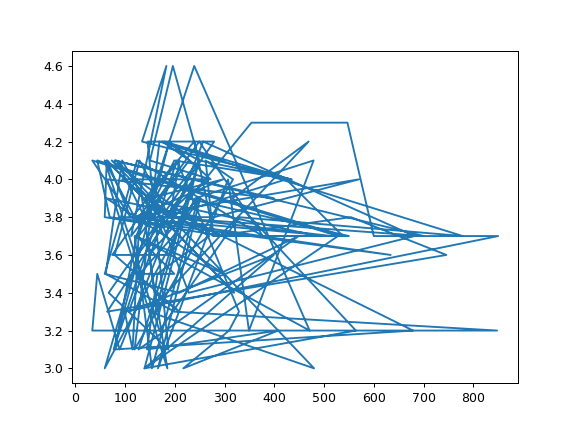

In [150]:
plt.plot(df.price, df.stars)

In [81]:
# Hmm, how to visualize this the best way?

In [151]:
bins = dict(zip(np.linspace(start=min(df.price), stop=max(df.price), num=8), range(10)))

In [152]:
bins

{34.0: 0,
 150.57142857142856: 1,
 267.14285714285711: 2,
 383.71428571428572: 3,
 500.28571428571428: 4,
 616.85714285714289: 5,
 733.42857142857144: 6,
 850.0: 7}

In [153]:
def get_bins(val):
    for threshold in sorted(bins.keys()):
        if val < threshold:
            return bins[threshold]
    

df['price_cohort'] = df.price.apply(get_bins)

In [154]:
df.groupby("price_cohort").size()

price_cohort
1.0    60
2.0    55
3.0    22
4.0    12
5.0     9
6.0     4
7.0     3
dtype: int64

In [155]:
# Let's cluster everything above 616 euro together to get a bigger cohort

mask = df.price_cohort.isin([6, 7])
df.loc[mask, 'price_cohort'] = 5

In [156]:
df.groupby("price_cohort").size()

price_cohort
1.0    60
2.0    55
3.0    22
4.0    12
5.0    16
dtype: int64

In [157]:
grouped_mean = df.groupby("price_cohort").agg({'stars' : np.mean}).reset_index()
grouped_median = df.groupby("price_cohort").agg({'stars' : np.median}).reset_index()

<IPython.core.display.Javascript object>


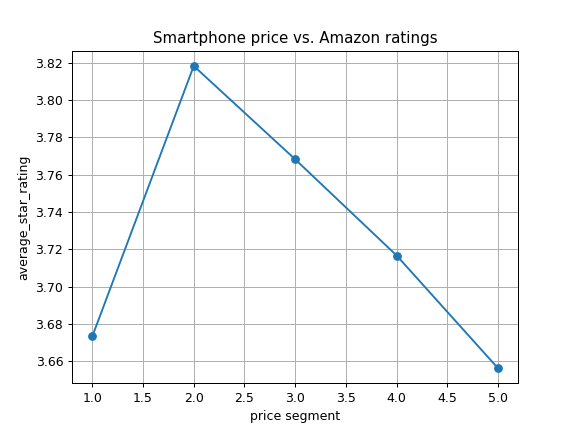

In [158]:
plt.figure()
plt.plot(grouped_mean.price_cohort, grouped_mean.stars, marker='o')
plt.title("Smartphone price vs. Amazon ratings")
ax = plt.gca()
ax.set_xlabel("price segment")
ax.set_ylabel("average_star_rating")
ax.grid()

<IPython.core.display.Javascript object>


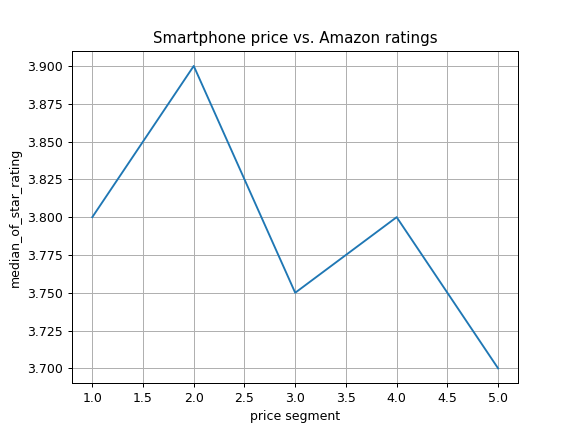

In [159]:
plt.figure()
plt.plot(grouped_median.price_cohort, grouped_median.stars)
plt.title("Smartphone price vs. Amazon ratings")
ax = plt.gca()
ax.set_xlabel("price segment")
ax.set_ylabel("median_of_star_rating")
ax.grid()